In [1]:
import subprocess
import os 
import matplotlib.pyplot as plt
import numpy as np
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

In [35]:
# brief Rapporter la solution 
def read_solution(file):
    ret = []
    with open(file) as f:
        while True:
            lines = f.readline()
            if not lines:
                break
            ret.append(lines[0:-1])
    return ret

# \brief Vérifier si la solution est la solution optimale que nous attendons
def check_solution_correct(file,solution):
    num=0
    last_score = "***"
    with open(file) as f:
        while True:
            lines = f.readline()
            if not lines:
                break
            if "Over Time" in lines:
                return 100000
                break
            if (lines[0]!="["):
                continue
            num += 1
            line = lines.split(" ")
            best = []
            for l in line[8:]:
                if("execution_end_time" in l or "mission_end_time" in l or "EndRoot" in l):
                    break
                best.append(l)
            if(line[1]==last_score):
                num -= 1
            last_score = line[1]
            print("solution ",solution,"\n")
            print("best ",best,"\n")
            if (operator.eq(best,solution)):
                #print("Really!")
                return num;
            
        return 20000;
        
# \Dessiner la figure en 3D pour la partie de recherche des paramètres
def dessin3D(data,dynamic=False, missionName="", dossier_debug=""):
    episilon = 0.1
    if(dynamic):
        %matplotlib notebook
    else:
        %matplotlib inline
    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    file_solution =  "./example/solutions/"+str(missionName)+".log"
    solution = read_solution(file_solution)
    list_ok_war,list_ok_pb,list_ok_ws,list_ko_war,list_ko_pb,list_ko_ws,list_over_war,list_over_pb,list_over_ws = [], [], [], [], [], [], [], [], []
    for i in range(len(data)):
        war = round(i*episilon,2)
        for j in range(len(data[0])):
            ws = round(j*episilon,2)
            for k in range(len(data[0][0])):
                pb = round(k*episilon,2)
                file_debug = dossier_debug+"debugParser"+missionName+"_war"+str(war)+"_ws"+str(ws)+"_pb"+str(pb)+".log"
                v = data[i,j,k]
                if(v>0):
                    if(int(v)==1):
                        couleur = 'green'
                        list_ok_war.append(war)
                        list_ok_ws.append(ws)
                        list_ok_pb.append(pb)
                    elif(int(v)==20000):
                        list_ko_war.append(war)
                        list_ko_ws.append(ws)
                        list_ko_pb.append(pb)
                        couleur = 'r'
                    else:
                        couleur = 'black'
                        list_over_war.append(war)
                        list_over_ws.append(ws)
                        list_over_pb.append(pb)
    ax1.scatter3D(list_ok_war,list_ok_ws,list_ok_pb, c='green', marker='.', label="Found")
    #Commenter la ligne suivante pour ne pas afficher les points rouges
    ax1.scatter3D(list_ko_war,list_ko_ws,list_ko_pb, c='red', marker='.', label="Not found")
    #Commenter la ligne suivante pour ne pas afficher les points noirs
    ax1.scatter3D(list_over_war,list_over_ws,list_over_pb, c='black', marker='.', label="Over time")
    ax1.set_xlabel('war')
    ax1.set_ylabel('ws')
    ax1.set_zlabel('pb')
    plt.legend(loc="upper right")
    plt.title("Mission "+missionName,fontsize=20)
    plt.show()
            
# \La fonction pour calculer le temps d'exécution
def calcul_time(repertoire):
    mini,maxi = 9999999, -1
    ret = 0
    files = os.listdir(repertoire)
    total = 0
    for file in files:
        ff = repertoire+"/"+file
#         print(ff)
        with open(ff) as f:
            while True:
                lines = f.readline()
                if not lines:
                    break
                if "Time used" in lines:
                    total += 1
                    s = ""+lines
                    s = s.split(":")
                    s=s[1]
                    s = s.split("(")
                    s=s[0]
                    entier=int(s)
                    if entier<mini:
                        mini=entier
                    elif entier>maxi:
                        maxi=entier
                    ret+=entier
                    break
    print("Mini = ",mini,", Maxi=", maxi)
    return ret, total

FOR  files_npy/9.02_bouclesImbriquees.npy 



<IPython.core.display.Javascript object>


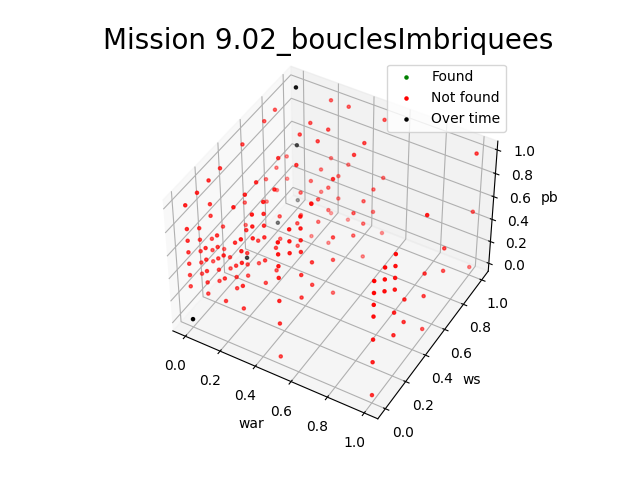

In [39]:
mission = "9.02_bouclesImbriquees"
dossier = "."
file = "files_npy/"+mission+".npy"
print("FOR ",file,"\n")
data = np.load(file)
dessin3D(data,dynamic=True, missionName=mission, dossier_debug=dossier+"files_debug/")

In [8]:
def dessinPossibles(data,dynamic=False, missionName="", dossier_debug=""):
    if(dynamic):
        %matplotlib notebook
    else:
        %matplotlib inline
    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    list_ok_war,list_ok_ws,list_ok_pb = [], [], []
    mini = 1
    maxi = int(data.max())
    num_possible = maxi-mini+1
    a = 0xFFFFFF
    colors = []
    for n in range(num_possible+2):
        temp =random.randint(0, 16**6+1)
        #temp = temp.zfill(6)
        s = hex(temp)
        #s = s.zfill(6)
        head = "#"
        s = s[2:]
        for k in range(6-len(s)):
            head += "0"
        s = head+s
        #print(s)
        colors.append(s)
        
    for i in range(len(data)):
        war = round(i*0.05,2)
        for j in range(len(data[0])):
            ws = round(j*0.05,2)
            for k in range(len(data[0][0])):
                pb = round(k*0.05,2)
                #file_debug = dossier_debug+"debugParser"+missionName+"_war"+str(war)+"_ws"+str(ws)+"_pb"+str(pb)+".log"
                #v = check_solution_correct(file_debug, solution)
                v = int(data[i,j,k])
                if(v==0):
                    continue
                couleur = colors[v]
                sc = ax1.scatter3D(war,ws,pb, c=couleur, marker='.')
    ax1.set_xlabel('war')
    ax1.set_ylabel('ws')
    ax1.set_zlabel('pb')
    plt.title("Mission "+missionName+" : "+str(num_possible)+" solution(s)",fontsize=12)
    plt.show()

FOR  files_npy/possible_5_simpleBoucleAvecDebutEtFin.npy 



<IPython.core.display.Javascript object>


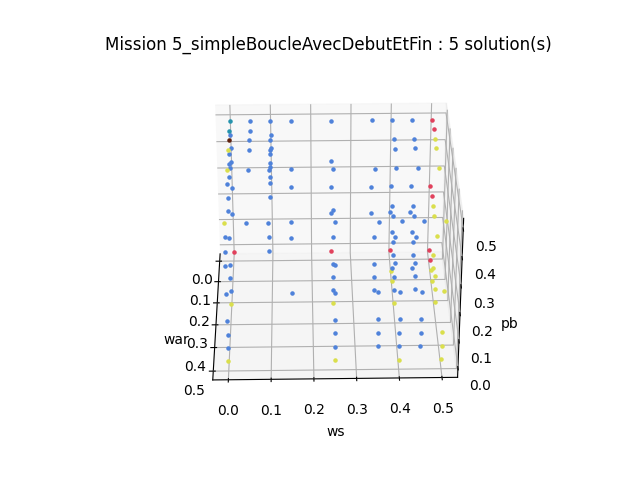

In [9]:
mission = "5_simpleBoucleAvecDebutEtFin"
dossier = "."
# file = "files_npy_nonRect/possible_"+mission+".npy"
file = "files_npy/possible_"+mission+".npy"
print("FOR ",file,"\n")
data = np.load(file)
dessinPossibles(data,dynamic=True, missionName=mission, dossier_debug=dossier+"files_debug/")

In [19]:
import decimal
from decimal import Decimal, getcontext
print(getcontext())
print (Decimal(1/3))
print(getattr(decimal, 'ROUND_FLOOR'))

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[FloatOperation], traps=[InvalidOperation, DivisionByZero, Overflow])
0.333333333333333314829616256247390992939472198486328125
ROUND_FLOOR
